In [24]:
import pandas as pd

In [25]:
# Load the dataset
file_path = 'adult.csv'
data = pd.read_csv(file_path)

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Find the mode of the 'workclass' column
workclass_mode = data['workclass'].mode()[0]

# Impute missing values in 'workclass' with its mode
data['workclass'].fillna(workclass_mode, inplace=True)

# Display the first few records to verify the imputation
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,<NA>,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,<NA>,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [26]:
# Mode Imputation for 'occupation'
occupation_mode = data['occupation'].mode()[0]
data['occupation'].fillna(occupation_mode, inplace=True)

# Creating a new category 'Unknown' for 'native.country'
data['native.country'].fillna('Unknown', inplace=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [27]:
# Verifying if there are any null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Data Preprocessing

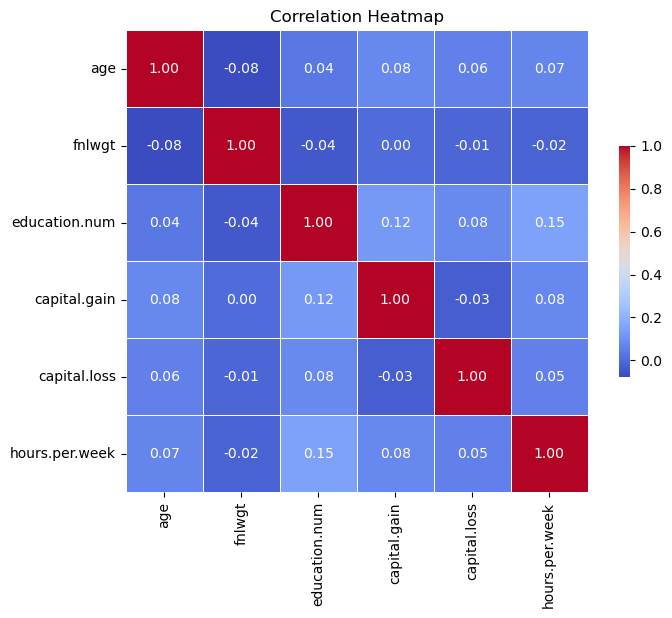

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [29]:
data = data.drop(columns=['fnlwgt', 'capital.gain', 'capital.loss'])

### Encoding Categorical Variables

In [30]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [31]:
from sklearn.preprocessing import LabelEncoder

education_order = {
    'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3,
    '9th': 4, '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8,
    'Prof-school': 9, 'Assoc-acdm': 10, 'Assoc-voc': 11,
    'Some-college': 12, 'Bachelors': 13, 'Masters': 14, 'Doctorate': 15
}

# Copying the data to a new DataFrame for encoding
data_encoded = data.copy()

# Label Encoding for 'education'
data_encoded['education'] = data_encoded['education'].map(education_order)

# Binary Encoding for 'sex' and 'income'
data_encoded['sex'] = data_encoded['sex'].map({'Male': 0, 'Female': 1})
data_encoded['income'] = data_encoded['income'].map({'<=50K': 0, '>50K': 1})

# Columns to encode
columns_to_encode = ['workclass', 'occupation', 'relationship', 'race', 'native.country']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Display the first few rows of the encoded dataset
print(data_encoded.head())

   age  workclass  education  education.num marital.status  occupation  \
0   90          3          8              9        Widowed           9   
1   82          3          8              9        Widowed           3   
2   66          3         12             10        Widowed           9   
3   54          3          3              4       Divorced           6   
4   41          3         12             10      Separated           9   

   relationship  race  sex  hours.per.week  native.country  income  
0             1     4    1              40              38       0  
1             1     4    1              18              38       0  
2             4     2    1              40              38       0  
3             4     4    1              40              38       0  
4             3     4    1              40              38       0  


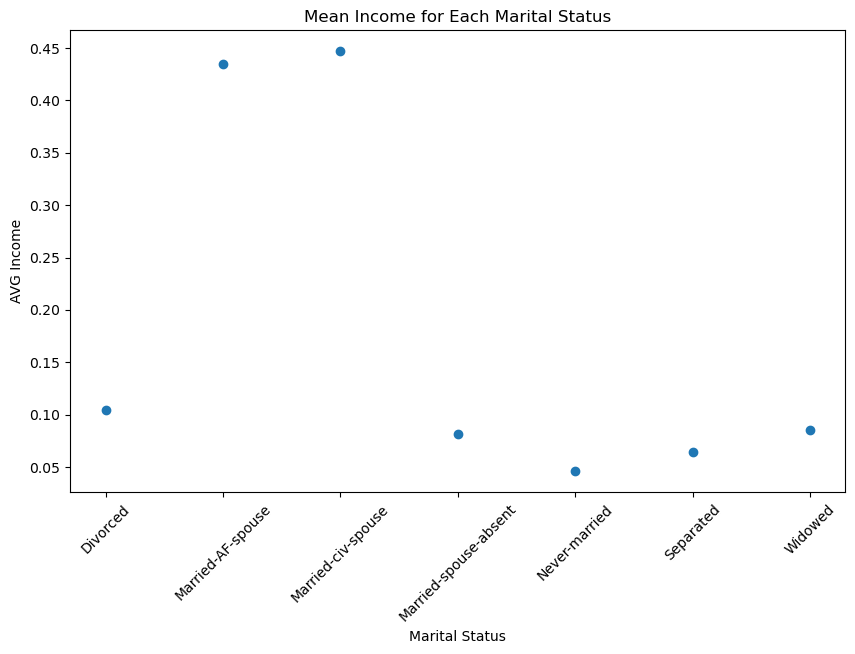

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean income for each marital status
mean_income_per_status = data_encoded.groupby('marital.status')['income'].mean()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_income_per_status.index, mean_income_per_status.values)
plt.title('Mean Income for Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('AVG Income')
plt.xticks(rotation=45)  
plt.show()

In [33]:
import pandas as pd

# Function to merge categories
def merge_marital_statuses(status):
    if status in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'Married-x-spouse'
    else:
        return status

# Apply the function to the 'marital.status' column and create a new column
data_encoded['new_marital_status'] = data_encoded['marital.status'].apply(merge_marital_statuses)
data_encoded = data_encoded.drop('marital.status', axis=1)
data_encoded['new_marital_status'] = label_encoder.fit_transform(data_encoded['new_marital_status'])


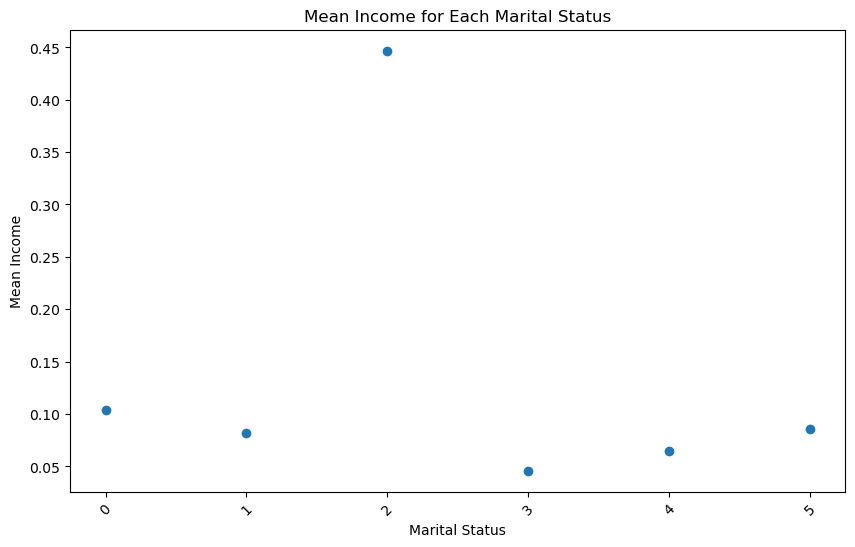

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean income for each marital status
mean_income_per_status = data_encoded.groupby('new_marital_status')['income'].mean()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_income_per_status.index, mean_income_per_status.values)
plt.title('Mean Income for Each Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)  
plt.show()

In [35]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [36]:
data_encoded.head()

,age,workclass,education,education.num,occupation,relationship,race,sex,hours.per.week,native.country,income,new_marital_status
0,90,3,8,9,9,1,4,1,40,38,0,5
1,82,3,8,9,3,1,4,1,18,38,0,5
2,66,3,12,10,9,4,2,1,40,38,0,5
3,54,3,3,4,6,4,4,1,40,38,0,0
4,41,3,12,10,9,3,4,1,40,38,0,4


### Feature Scaling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into features and target variable
X = data_encoded.drop('income', axis=1)  
y = data_encoded['income']  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=0.95)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
print(X_train_pca)

[[-0.29354329  0.33323474  0.21044187 ... -0.09401944  0.01410372
  -0.03832595]
 [ 0.55878492 -0.08334339 -0.03832949 ... -0.23506094 -0.03911486
  -0.04144251]
 [ 0.82450699  0.42390375 -0.34271384 ... -0.0362596  -0.00515173
   0.00439167]
 ...
 [-0.45182295 -0.40484139  0.05174495 ...  0.03455169  0.47908291
  -0.00700186]
 [-0.41962864  0.47271597 -0.19498    ... -0.02595582  0.02176293
  -0.01645788]
 [-0.12763083  0.10348874  0.40525847 ... -0.04602635 -0.0057052
   0.1396896 ]]


# Gradient Boosting

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert the dataset into an optimized data structure called Dmatrix
dtrain = xgb.DMatrix(X_train_pca, label=y_train)
dtest = xgb.DMatrix(X_test_pca, label=y_test)

# Define XGBoost parameters
params = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.1,      # the training step for each iteration
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss',  # evaluation metric
    'nthread': 4     # the number of threads to use
}

# Specify the number of training iterations
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Predictions on the test set
preds = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in preds]

# Evaluate the model
gradient_boosting_accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (gradient_boosting_accuracy * 100.0))


Accuracy: 83.31%


In [42]:
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

# Setup the K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', n_jobs=-1, cv=kf)

# Fit GridSearchCV
grid_search.fit(X_train_pca, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
gradient_best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score: %.2f%%" % (gradient_best_score * 100.0))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 83.81%


# SVM

In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='rbf')

# Train the model
svm_model.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_pca)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (svm_accuracy * 100.0))


Accuracy: 83.02%


In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf', 'poly']  # Type of SVM kernel
}

# Initialize the Support Vector Classifier
svm_model = SVC()

# Setup the K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy', n_jobs=-1, cv=kf)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_parameters)
print("Best Score: %.2f%%" % (best_score * 100.0))
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))


# CART Algorithm

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score


# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier (CART)
cart_model = DecisionTreeClassifier()

# Setup the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(cart_model, param_grid, scoring='accuracy', n_jobs=-1, cv=kf)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_cart_model = grid_search.best_estimator_
y_pred = best_cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_parameters)
print("Best Score: %.2f%%" % (best_score * 100.0))
print("Test Accuracy: %.2f%%" % (cart_accuracy * 100.0))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 83.22%
Test Accuracy: 83.17%


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=2)

# Train the model
dtree.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (decision_tree_accuracy * 100.0))


Accuracy: 82.44%


# Random Forest

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, min_samples_leaf=28, random_state=42)

# Train the model
rf_model = rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
random_forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (random_forest_accuracy * 100.0))


Accuracy: 83.83%


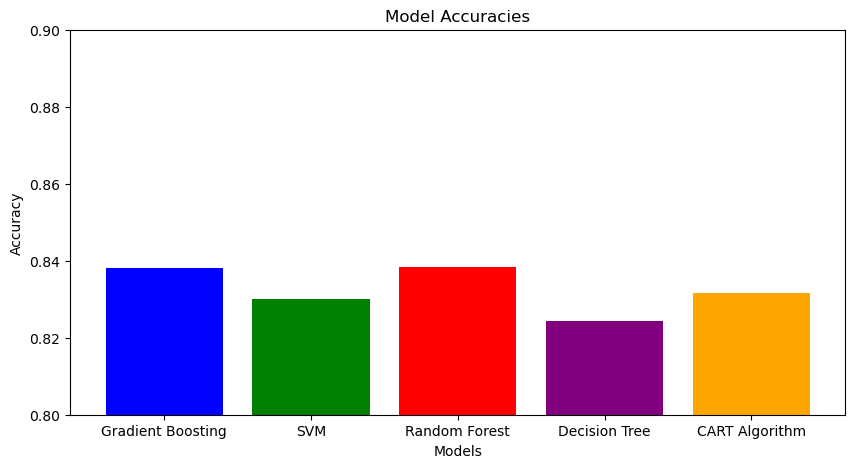

In [49]:
model_accuracies = {
    'Gradient Boosting': gradient_best_score,
    'SVM': svm_accuracy,
    'Random Forest': random_forest_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'CART Algorithm': cart_accuracy
}

# Names of the models
model_names = list(model_accuracies.keys())
# Corresponding accuracies
accuracies = list(model_accuracies.values())

# Creating the bar graph
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.8,0.9)
# Adding the title and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the bar graph
plt.show()


# Save the model

In [50]:
from joblib import dump


dump(rf_model, 'best_cart_model.joblib')

['best_cart_model.joblib']

# Load the model

In [51]:
from joblib import load
from sklearn.metrics import accuracy_score

best_rf_model = load('best_cart_model.joblib')

predictions = best_rf_model.predict(X_test)
loaded_model_accuracy = accuracy_score(y_test, predictions)

print("Loaded Model Test Accuracy: %.2f%%" % (loaded_model_accuracy * 100.0))


Loaded Model Test Accuracy: 83.83%


# GUI

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk

root = tk.Tk()
root.title("Census Income Prediction")

root.geometry("1000x563")

image_path = "image.png" 
bg_image = Image.open(image_path)
bg_photo = ImageTk.PhotoImage(bg_image)

root.bg_photo = bg_photo

bg_label = tk.Label(root, image=bg_photo)
bg_label.place(relwidth=1, relheight=1)

title_label = ttk.Label(root, text="Census Income Prediction", font=("Helvetica", 16))
title_label.pack(pady=10)

workclass_mapping = {'Federal-gov':0, 'Local-gov':1, 'Never-worked':2, 'Private':3, 'Self-emp-inc':4, 'Self-emp-not-inc':5, 'State-gov':6, 'Without-pay':7}
occupation_mapping = {'Adm-clerical':0, 'Armed-Forces':1, 'Craft-repair':2, 'Exec-managerial':3, 'Farming-fishing':4, 'Handlers-cleaners':5, 'Machine-op-inspct':6, 'Other-service':7, 'Priv-house-serv':8, 'Prof-specialty':9, 'Protective-serv':10, 'Sales':11, 'Tech-support':12, 'Transport-moving':13}
marital_mapping = {'Divorced':0, 'Married-x-spouse':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
relationship_mapping = {'Husband':0, 'Not-in-family':1, 'Other-relative':2, 'Own-child':3, 'Unmarried':4, 'Wife':5}
race_mapping = {'Amer-Indian-Eskimo':0, 'Asian-Pac-Islander':1, 'Black':2, 'Other':3, 'White':4}
sex_mapping = {'Female':1, 'Male':0}
country_mapping = {
    'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columbia': 3, 'Cuba': 4, 
    'Dominican-Republic': 5, 'Ecuador': 6, 'El-Salvador': 7, 'England': 8, 
    'France': 9, 'Germany': 10, 'Greece': 11, 'Guatemala': 12, 'Haiti': 13, 
    'Holand-Netherlands': 14, 'Honduras': 15, 'Hong': 16, 'Hungary': 17, 
    'India': 18, 'Iran': 19, 'Ireland': 20, 'Italy': 21, 'Jamaica': 22, 
    'Japan': 23, 'Laos': 24, 'Mexico': 25, 'Nicaragua': 26, 
    'Outlying-US(Guam-USVI-etc)': 27, 'Peru': 28, 'Philippines': 29, 
    'Poland': 30, 'Portugal': 31, 'Puerto-Rico': 32, 'Scotland': 33, 
    'South': 34, 'Taiwan': 35, 'Thailand': 36, 'Trinadad&Tobago': 37, 
    'United-States': 38, 'Unknown': 39, 'Vietnam': 40, 'Yugoslavia': 41
}


def predict():
    try:
        age = int(age_entry.get())
        education_num = int(education_num_entry.get())
        working_hours = int(working_hours_entry.get())

        workclass_encoded = workclass_mapping[work_class_combobox.get()]
        occupation_encoded = occupation_mapping[occupation_combobox.get()]
        education_encoded = education_order[education_combobox.get()]
        marital_encoded = marital_mapping[marital_status_combobox.get()]
        relationship_encoded = relationship_mapping[relationship_combobox.get()]
        race_encoded = race_mapping[race_combobox.get()]
        sex_encoded = sex_mapping[sex_combobox.get()]
        country_encoded = country_mapping[country_combobox.get()]

        features = [age, workclass_encoded, education_encoded, education_num, occupation_encoded, relationship_encoded, race_encoded, sex_encoded, working_hours, country_encoded, marital_encoded]

        prediction = best_rf_model.predict([features])

        if prediction[0] == 0:
            messagebox.showinfo("Prediction", "Income less than 50K")
        else:
            messagebox.showinfo("Prediction", "Income more than 50K")
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid data.")
    except KeyError:
        messagebox.showerror("Input Error", "Please select an option from all dropdowns.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

form_frame = ttk.Frame(root)
form_frame.pack(pady=10, fill='x', expand=True)

def create_labeled_entry(parent, label_text):
    frame = ttk.Frame(parent)
    label = ttk.Label(frame, text=label_text)
    label.pack(side="left")
    entry = ttk.Entry(frame)
    entry.pack(side="right", fill='x', expand=True)
    frame.pack(fill='x', expand=True, padx=10, pady=2)
    return entry

def create_labeled_combobox(parent, label_text, options):
    frame = ttk.Frame(parent)
    label = ttk.Label(frame, text=label_text)
    label.pack(side="left")
    combobox = ttk.Combobox(frame, values=options)
    combobox.pack(side="right", fill='x', expand=True)
    frame.pack(fill='x', expand=True, padx=10, pady=2)
    return combobox

age_entry = create_labeled_entry(form_frame, "Age:")
working_hours_entry = create_labeled_entry(form_frame, "Working hour/week:")
education_num_entry = create_labeled_entry(form_frame, "Number of education year:")

occupations = ['Prof-specialty', 'Exec-managerial', 'Machine-op-inspct',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv']
education_levels = ['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool']
work_classes = ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked']
marital_statuses = ['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Divorced', 'Separated', 'Widowed']
relationships = ['Husband', 'Not-in-family', 'Other-relative', 'Wife', 'Own-child', 'Unmarried']
races = ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
sexes = ['Male', 'Female']
countries = ['United-States', 'Unknown', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)']

occupation_combobox = create_labeled_combobox(form_frame, "Occupation:", occupations)
education_combobox = create_labeled_combobox(form_frame, "Education:", education_levels)
work_class_combobox = create_labeled_combobox(form_frame, "Work Class:", work_classes)
marital_status_combobox = create_labeled_combobox(form_frame, "Marital-status:", marital_statuses)
relationship_combobox = create_labeled_combobox(form_frame, "Relationship:", relationships)
race_combobox = create_labeled_combobox(form_frame, "Race:", races)
sex_combobox = create_labeled_combobox(form_frame, "Sex:", sexes)
country_combobox = create_labeled_combobox(form_frame, "Native-country:", countries)

predict_button = ttk.Button(root, text="Predict", command=predict)
predict_button.pack(pady=20)

root.mainloop()
